# Aula 13 - Word Embeddings, Transformers, e Introdução ao BERT

## PyTorch

PyTorch é uma biblioteca de aprendizado de máquina de código aberto baseada em Python, desenvolvida pelo Facebook (Meta). Ela é conhecida por sua flexibilidade e é amplamente utilizada em pesquisas e desenvolvimento de modelos de deep learning.

Principais Características:

1. Tensores Dinâmicos:

A principal diferença entre PyTorch e outras bibliotecas é a adoção de tensores dinâmicos. Isso significa que as operações nos tensores podem ser construídas dinamicamente durante o tempo de execução, facilitando a criação de modelos mais dinâmicos e adaptáveis.

2. Diferenciação Automática:

O módulo autograd oferece diferenciação automática. Isso significa que, ao calcular a saída de um modelo, o PyTorch pode automaticamente calcular os gradientes e, assim, facilitar o treinamento de modelos.

3. Construção de Modelos Flexível:

PyTorch permite construir modelos de aprendizado de máquina de maneira intuitiva usando a classe nn.Module. Essa abordagem modular facilita a criação e o entendimento de arquiteturas de modelos complexos.

4. Otimização e Otimizadores:

O módulo torch.optim fornece otimizadores comuns para ajustar os parâmetros dos modelos durante o treinamento. Isso inclui otimizadores como SGD, Adam e outros.

5. Suporte à GPU:

PyTorch oferece suporte nativo à computação em GPU, acelerando significativamente o treinamento de modelos, especialmente em tarefas intensivas computacionalmente.

6. Comunidade Ativa e Documentação Rica:

PyTorch tem uma comunidade ativa e uma documentação rica. A comunidade ativa fornece suporte e recursos adicionais, enquanto a documentação facilita a aprendizagem e o desenvolvimento.

Precisaremos passar por alguns conceitos e imports específicos ao PyTorch para depois abordarmos o BERT, pois todos esses conceitos serão necessários para o treinamento do modelo.

### Tensores

Tensores são estruturas fundamentais em PyTorch, usadas para representar dados e realizar operações em modelos de aprendizado de máquina. Eles são semelhantes aos arrays multidimensionais, mas têm algumas diferenças chave em relação aos arrays comuns em Python, como os fornecidos pela biblioteca Numpy. Hoje veremos um pouco sobre eles, e serão aprofundados na próxima aula, quando discutirmos os primeiros passos na classificação de texto com o BERTimbau. Aqui está um tutorial do próprio Pytorch -> [Link](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html).

#### Diferenças Entre Tensores e Arrays em Python (Numpy):

1. Computação em GPU:

* PyTorch:
Tensores em PyTorch oferecem suporte nativo para computação em GPU, o que permite aceleração significativa em tarefas intensivas computacionalmente.
* Numpy:
Numpy também pode aproveitar a computação em GPU, mas requer bibliotecas adicionais, como CuPy.
Diferenciação Automática:

2. PyTorch:
* PyTorch inclui um mecanismo de diferenciação automática (autograd), permitindo o cálculo automático de gradientes para suportar o treinamento de modelos de aprendizado de máquina.
* Numpy:
Numpy não oferece um mecanismo de diferenciação automática integrado.


3. Dinamicidade:

* PyTorch:
PyTorch utiliza tensores dinâmicos, o que significa que as operações nos tensores podem ser construídas dinamicamente durante o tempo de execução. Isso facilita a criação de modelos mais dinâmicos e adaptáveis.
* Numpy:
Numpy trabalha com arrays estáticos e as operações são definidas durante a fase de construção, tornando a construção de modelos mais rígida.
Integração com Redes Neurais:

4. Machine/Deep Learning:

* PyTorch:
PyTorch é amplamente usado na implementação de redes neurais, e os tensores são a estrutura fundamental para representar dados e parâmetros de modelos.
* Numpy:
Numpy é uma biblioteca mais geral para computação científica, e embora seja usado em aprendizado de máquina, não possui a integração específica para redes neurais encontrada no PyTorch.

In [1]:
import torch

# Criando um tensor
x = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Operações com tensores
y = x + 2
z = torch.matmul(x, x.T)

# Exibindo os resultados
print("Tensor Original:")
print(x)

print("\nOperação de Adição:")
print(y)

print("\nOperação de Produto Matricial:")
print(z)


Tensor Original:
tensor([[1, 2, 3],
        [4, 5, 6]])

Operação de Adição:
tensor([[3, 4, 5],
        [6, 7, 8]])

Operação de Produto Matricial:
tensor([[14, 32],
        [32, 77]])


Este exemplo cria um tensor em PyTorch, realiza operações simples (adição e produto matricial) e exibe os resultados. Tenha em mente que tensores em PyTorch compartilham semelhanças conceituais e sintáticas com arrays em Numpy, mas têm vantagens específicas para tarefas de aprendizado de máquina e deep learning.

#### Atributos de um Tensor

Assim como o numpy, temos métodos específicos que nos permitem avaliar as característicos

In [2]:
tensor = torch.rand(3,4)

print(f"Shape do tensor: {tensor.shape}")
print(f"Tipo de dado do tensor: {tensor.dtype}")
print(f"Device (Dispositivo) em que o tensor se encontra: {tensor.device}")

Shape do tensor: torch.Size([3, 4])
Tipo de dado do tensor: torch.float32
Device (Dispositivo) em que o tensor se encontra: cpu


A última linha da célula mostra uma diferença essencial dos tensores do Pytorch: podemos colocá-los em outros dispositivos (como a GPU - placa de vídeo) que nos permite acelerar o processo de treinamento do modelo. Por exemplo, com o seguinte código, podemos mover o tensor para a GPU, se disponível:

In [3]:
if torch.cuda.is_available():
    tensor = tensor.to("cuda")
else:
    print('Erro. Não há GPU disponível')

Como não ativamos a GPU no Colab, não podemos ativar o tensor dentro dela. Para mudar isso, vá em "Ambiente de Execução" > "Alterar o tipo de ambiente de execução" e escolha algum acelerador de hardware que não seja o "CPU". Com isso, podemos colocar o tensor nesse acelerador.

**AVISO: HÁ UM LIMITE DE TEMPO DE USO GRATUITO DA GPU NO GOOGLE COLAB, TOME CUIDADO E NÃO ATIVE À TOA (O USO É CONTADO A PARTIR DE SEU E-MAIL)**

In [4]:
if torch.cuda.is_available():
    tensor = tensor.to("cuda")
    print("GPU Diponível!")
else:
    print('Erro. Não há GPU disponível')

GPU Diponível!


#### Indexação de Tensores


A indexação de tensores em PyTorch segue padrões semelhantes à indexação de arrays em Python, com algumas particularidades adicionais para suportar operações específicas de aprendizado de máquina e manipulação de dados multidimensionais. Vamos explorar as principais formas de indexação de tensores em PyTorch:

1. Indexação Simples

Você pode acessar elementos individuais de um tensor usando índices. Lembre-se de que a indexação em PyTorch é baseada em zero (o primeiro elemento tem índice 0).

In [5]:
# Criando um tensor
x = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Acessando um elemento específico
elemento = x[1, 2]  # Obtendo o valor 6

print(elemento)

tensor(6)


2. Slicing (Fatiamento)

Você pode usar a indexação por fatias para extrair partes específicas de um tensor.

In [6]:
# Extraindo uma submatriz
submatriz = x[:, 1:]  # Todas as linhas, da segunda coluna em diante

print(submatriz)

tensor([[2, 3],
        [5, 6]])


3. Indexação Booleana

Usando tensores booleanos para filtrar elementos com base em uma condição.

In [7]:
# Criando um tensor booleano com base em uma condição
condicao = x > 3

# Usando a condição para indexação booleana
elementos_filtrados = x[condicao]


print(elementos_filtrados)

tensor([4, 5, 6])


#### Juntando tensores

Unir (ou concatenar) tensores em PyTorch é uma operação comum ao trabalhar com dados em aprendizado de máquina e deep learning. PyTorch oferece a função torch.cat() para concatenar tensores ao longo de uma dimensão específica. Vamos explorar como essa operação funciona:

1. Concatenação ao longo de uma dimensão:

A função torch.cat() é usada para concatenar tensores ao longo de uma dimensão específica.

In [8]:
# Criando dois tensores
tensor1 = torch.tensor([[1, 2], [3, 4]])
tensor2 = torch.tensor([[5, 6]])

# Concatenando ao longo da dimensão 0 (linhas)
resultado = torch.cat((tensor1, tensor2), dim=0)

print(resultado)


tensor([[1, 2],
        [3, 4],
        [5, 6]])


2. Concatenação ao longo de outras dimensões:

Você pode alterar a dimensão ao longo da qual deseja concatenar, especificando o argumento dim.

In [9]:
# Concatenando ao longo da dimensão 1 (colunas)
resultado = torch.cat((tensor1, tensor2.T), dim=1)

print(resultado)

tensor([[1, 2, 5],
        [3, 4, 6]])


3. Concatenação de Tensores com Dimensões Diferentes:

Ao concatenar tensores com diferentes dimensões, é importante que todas as dimensões, exceto a dimensão de concatenação, sejam iguais.

In [10]:
tensor3 = torch.tensor([[7], [8]])

# Concatenando ao longo da dimensão 1 (colunas)
result = torch.cat((tensor1, tensor3), dim=1)

Aqui, a operação de concatenação ao longo da dimensão 1 (colunas) é possível porque a dimensão 0 (número de linhas) é a mesma.

In [11]:
print(result)

tensor([[1, 2, 7],
        [3, 4, 8]])


4. Função torch.stack():

Além da função torch.cat(), a função torch.stack() pode ser usada para empilhar tensores ao longo de uma nova dimensão. No entanto, ambos os tensores tem de ter o mesmo tamanho

In [12]:
# Empilhando tensores ao longo de uma nova dimensão
stacked_result = torch.stack((tensor1, tensor2), dim=0)

print(stacked_result)

RuntimeError: stack expects each tensor to be equal size, but got [2, 2] at entry 0 and [1, 2] at entry 1

In [13]:
tensor4 = torch.tensor([[4, 3], [2, 1]])

# Empilhando tensores ao longo de uma nova dimensão
stacked_result = torch.stack((tensor1, tensor4), dim=0)

print(stacked_result)

tensor([[[1, 2],
         [3, 4]],

        [[4, 3],
         [2, 1]]])


Essas operações de concatenação são essenciais ao construir e manipular dados em PyTorch, especialmente ao lidar com lotes de dados ou combinar tensores para entrada em modelos de aprendizado de máquina. Certifique-se de escolher a dimensão correta para a concatenação, dependendo da estrutura específica dos seus dados. Você pode ler mais sobre tensores em PyTorch no site [oficial](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html).

### Datasets e Dataloaders

Em PyTorch, os conceitos de Dataset e DataLoader são fundamentais para trabalhar eficientemente com conjuntos de dados, especialmente ao treinar modelos de aprendizado de máquina. Vamos explorar cada um desses conceitos:

Dataset em PyTorch:
Um Dataset em PyTorch é uma classe que representa um conjunto de dados. Ele fornece uma interface uniforme para acessar as amostras de dados, permitindo que você crie seus próprios conjuntos de dados ou use conjuntos de dados padrão fornecidos por PyTorch.

A classe base para um Dataset em PyTorch é torch.utils.data.Dataset, e ela exige que você implemente os métodos __len__ (retorna o tamanho do conjunto de dados) e __getitem__ (retorna uma amostra específica). [Leia Mais](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

In [14]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = {'data': self.data[idx], 'label': self.labels[idx]}
        return sample

DataLoader em PyTorch:

Um DataLoader é um iterador que facilita o acesso a conjuntos de dados durante o treinamento de modelos. Ele automaticamente gera mini lotes (batches) de dados e lida com detalhes como embaralhamento e paralelismo de leitura de dados.

O DataLoader é construído sobre um Dataset e simplifica o processo de criação de lotes de dados para o treinamento de modelos. O seguinte exemplo vai dar erro pois ainda não carregamos nenhum banco de dados



```
# from torch.utils.data import DataLoader

# Criando uma instância de CustomDataset
custom_dataset = CustomDataset(data, labels)

# Criando um DataLoader usando o CustomDataset
dataloader = DataLoader(dataset=custom_dataset,
                        batch_size=64,
                        shuffle=True)
```



Neste exemplo, batch_size define o tamanho de cada mini lote, e shuffle=True indica que os dados serão embaralhados antes de cada época de treinamento.

**Batch Size**

O batch_size é um parâmetro crucial ao treinar modelos de aprendizado de máquina, e sua função está relacionada ao conceito de treinamento em partes, ou lotes (batch training). Vamos entender a importância do batch_size:

* Treinamento em Mini Lotes:

Treinar modelos usando todo o conjunto de dados de uma vez pode ser ineficiente e impraticável, especialmente para grandes conjuntos de dados. Em vez disso, o treinamento é frequentemente realizado em mini lotes, onde o modelo é atualizado com uma parte do conjunto de dados em cada iteração.
Eficiência Computacional:

Usar mini lotes permite aproveitar a eficiência computacional de hardware, como GPUs. Muitas operações em hardware otimizado para aprendizado de máquina podem ser paralelizadas, tornando o treinamento mais rápido ao processar múltiplos exemplos ao mesmo tempo.

* Regularização Estocástica:

O treinamento em mini lotes introduz uma forma de regularização chamada "regularização estocástica". Cada mini lote é uma amostra estocástica do conjunto de dados, o que adiciona uma fonte de variação ao treinamento. Isso pode ajudar a prevenir o overfitting, pois o modelo não vê o conjunto de dados completo em cada iteração.

* Memória Disponível:

Limitações de memória podem ser um fator ao treinar modelos, especialmente em ambientes com recursos limitados. Usar mini lotes permite treinar modelos mesmo quando o conjunto de dados não cabe totalmente na memória.

* Ajuste de Hiperparâmetros:

O tamanho do mini lote é um hiperparâmetro que pode afetar o desempenho do modelo. Em geral, tamanhos de mini lote menores podem levar a atualizações mais frequentes do modelo, enquanto tamanhos maiores podem oferecer uma estimativa de gradiente mais estável.

* Batch Size e Número de Iterações:

O número total de iterações necessárias para uma época de treinamento é determinado pelo tamanho do conjunto de dados dividido pelo tamanho do mini lote. Portanto, o batch_size também influencia a quantidade de processamento necessária para treinar um modelo.

Em resumo, o batch_size é um parâmetro essencial que afeta a eficiência de treinamento, a generalização do modelo e a utilização eficaz de recursos computacionais. Escolher um valor apropriado para o batch_size é uma consideração importante ao treinar modelos de aprendizado de máquina.

Essa forma de escrever o código é um pouco diferente do que já vimos, para isso, vamos discutir um pouco programação orientada à objetos (POO).

**Programação Orientada à Objetos**

A programação orientada a objetos (POO) é um paradigma de programação que organiza o código em "objetos", entidades que possuem dados e métodos associados. No contexto de datasets e dataloaders em PyTorch:

**Objeto Dataset**:

Um conjunto de dados é encapsulado como um objeto, geralmente uma classe que herda da classe torch.utils.data.Dataset. Essa classe inclui métodos como __len__ (retorna o tamanho do conjunto de dados) e __getitem__ (retorna uma amostra específica).


**Objeto DataLoader**:

Um DataLoader é um objeto que gerencia o carregamento eficiente de dados durante o treinamento. Ele recebe um objeto Dataset e cria mini lotes (batches) de dados. O DataLoader manipula detalhes como embaralhamento e paralelismo de leitura de dados.


**Benefícios da POO para Datasets e DataLoaders**:

* Encapsulação: A POO permite encapsular dados e funcionalidades relacionadas em objetos, tornando o código mais modular e organizado.
* Reusabilidade: Classes de datasets podem ser reutilizadas em diferentes partes do código ou em projetos diferentes, promovendo a reusabilidade do código.
* Herança e Polimorfismo: O uso de herança permite criar classes mais especializadas, enquanto o polimorfismo permite que objetos de diferentes classes sejam tratados de maneira uniforme.


Exemplo Rápido: Imagine que você está criando um objeto para representar um conjunto de imagens e seus rótulos. Você poderia ter métodos para carregar imagens, pré-processar dados e acessar rótulos. Essa classe seria então utilizada em um DataLoader para treinar um modelo.



```
# from torch.utils.data import Dataset, DataLoader

class ImageDataset(Dataset):
    def __init__(self, image_paths, labels):
        self.image_paths = image_paths
        self.labels = labels

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Lógica para carregar imagem e rótulo
        image = load_image(self.image_paths[idx])
        label = self.labels[idx]
        return {'image': image, 'label': label}

# Uso em um DataLoader
dataset = ImageDataset(image_paths, labels)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
```



## Word Embeddings

### **O que são Word Embeddings**?

Word embeddings são representações vetoriais densas de palavras em um espaço contínuo de baixa dimensão. Eles permitem capturar relações semânticas e sintáticas entre palavras com base em como elas aparecem em um grande corpus de texto. Em vez de representar palavras como vetores esparsos (como em métodos tradicionais, por exemplo, bag-of-words ou TF-IDF), os embeddings mapeiam palavras para vetores densos onde:

* Palavras com significados semelhantes têm representações próximas no espaço vetorial.
* Relações semânticas e sintáticas podem ser capturadas. Por exemplo, a relação "rei - homem + mulher" pode resultar em "rainha".

Word embeddings são úteis para várias tarefas de NLP, como tradução automática, análise de sentimentos e sistemas de recomendação.

### **Word2Vec**
O Word2Vec é uma técnica popular para treinar word embeddings. Ele utiliza uma rede neural simples para prever relações contextuais entre palavras. Existem dois principais métodos no Word2Vec:

CBOW (Continuous Bag of Words): Prever uma palavra com base no contexto (as palavras ao redor).

Skip-gram: Prever o contexto de uma palavra-alvo.

Neste tutorial, implementaremos o modelo Skip-gram. Não se preocupe, geralmente você não vai treinar modelos skip-gram, mas é só um exemplo para vocês entenderem como funciona o Word2Vec, o que são word embeddings e como podem ser utilizadas nas tarefas de classificação de texto. O seguinte exemplo foi baseado no [tutorial de Word2Vec do Tensorflow](https://www.tensorflow.org/text/tutorials/word2vec). Veja também o [tutorial do Pytorch](https://pytorch.org/tutorials/beginner/nlp/word_embeddings_tutorial.html).

* Word2Vec com Skip-Gram no PyTorch

Vamos usar uma lista de tweets fictícios como exemplo:

In [15]:
tweets = [
    "A vacina de COVID-19 salva vidas.",
    "Confie na ciência e vacine-se.",
    "As vacinas são seguras e eficazes.",
    "A desinformação sobre vacinas prejudica a saúde pública.",
    "Muitas pessoas já foram vacinadas contra o COVID-19.",
    "A vachina é perigosa e não foi testada!",
    "Essas vacinas experimentais são uma farsa.",
    "Eu não confio nessa vacina feita às pressas.",
    "A vacina só serve para enriquecer as farmacêuticas.",
    "Prefiro confiar na minha imunidade natural!"
]

* Pré-processamento e Vetorização

Para representar o texto como números:

1. Tiramos as stopwords e Tokenizamos o texto (separamos em palavras).
2. Criamos um vocabulário (mapa de palavra -> índice).
3. Convertemos os textos em sequências numéricas.

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
import re
from nltk.corpus import stopwords
from collections import Counter

# Stopwords em português
stopwords_pt = set(stopwords.words("portuguese"))

# Função de pré-processamento
def preprocess(text):
    text = re.sub(r"[^\w\s]", "", text.lower())  # Remover pontuação e converter para minúsculas
    tokens = text.split()  # Tokenizar
    return [token for token in tokens if token not in stopwords_pt]  # Remover stopwords

# Tokenização
tokenized_tweets = [preprocess(tweet) for tweet in tweets]

# Construir vocabulário
all_words = [word for tweet in tokenized_tweets for word in tweet]
word_counts = Counter(all_words)
vocab = {word: idx for idx, (word, _) in enumerate(word_counts.items())}
inverse_vocab = {idx: word for word, idx in vocab.items()}  # Para recuperar palavras

print("Vocabulário (após remoção de stopwords):", vocab)

Vocabulário (após remoção de stopwords): {'vacina': 0, 'covid19': 1, 'salva': 2, 'vidas': 3, 'confie': 4, 'ciência': 5, 'vacinese': 6, 'vacinas': 7, 'seguras': 8, 'eficazes': 9, 'desinformação': 10, 'sobre': 11, 'prejudica': 12, 'saúde': 13, 'pública': 14, 'muitas': 15, 'pessoas': 16, 'vacinadas': 17, 'contra': 18, 'vachina': 19, 'perigosa': 20, 'testada': 21, 'experimentais': 22, 'farsa': 23, 'confio': 24, 'nessa': 25, 'feita': 26, 'pressas': 27, 'serve': 28, 'enriquecer': 29, 'farmacêuticas': 30, 'prefiro': 31, 'confiar': 32, 'imunidade': 33, 'natural': 34}


Qual o tamanho do nosso vocabulário?

In [20]:
print("Tamanho do vocabulário:", len(vocab))

Tamanho do vocabulário: 35


* Criação de Pares para o skip-gram

No modelo Skip-gram, o objetivo é prever as palavras de contexto com base em uma palavra-alvo. Vamos gerar os pares necessários. Criamos pares (target, context) considerando uma janela de contexto definida.

In [21]:
# Função para gerar pares de Skipgram a partir dos tweets tokenizados
def generate_skipgram_pairs(tokenized_tweets, vocab, window_size=2):
    pairs = []  # Lista para armazenar os pares (palavra central, palavra de contexto)

    # Itera sobre cada tweet tokenizado
    for tweet in tokenized_tweets:
        # Converte as palavras do tweet para seus índices correspondentes no vocabulário
        indices = [vocab[word] for word in tweet if word in vocab]  # Lista de índices

        # Itera sobre as palavras no tweet
        for center_idx, center_word in enumerate(indices):
            # Itera sobre o intervalo de contexto ao redor da palavra central
            for w in range(-window_size, window_size + 1):
                context_idx = center_idx + w  # Calcula o índice da palavra de contexto
                # Verifica se o índice da palavra de contexto é válido
                if 0 <= context_idx < len(indices) and center_idx != context_idx:
                    # Adiciona o par (palavra central, palavra de contexto) à lista
                    pairs.append((center_word, indices[context_idx]))

    return pairs  # Retorna todos os pares gerados

# Exemplo de uso da função para gerar os pares de Skipgram
skipgram_pairs = generate_skipgram_pairs(tokenized_tweets, vocab)

# Exibe um exemplo de pares gerados com as palavras reais (usando inverse_vocab para mapear os índices de volta para palavras)
print("Exemplo de pares:", [(inverse_vocab[t], inverse_vocab[c]) for t, c in skipgram_pairs])


Exemplo de pares: [('vacina', 'covid19'), ('vacina', 'salva'), ('covid19', 'vacina'), ('covid19', 'salva'), ('covid19', 'vidas'), ('salva', 'vacina'), ('salva', 'covid19'), ('salva', 'vidas'), ('vidas', 'covid19'), ('vidas', 'salva'), ('confie', 'ciência'), ('confie', 'vacinese'), ('ciência', 'confie'), ('ciência', 'vacinese'), ('vacinese', 'confie'), ('vacinese', 'ciência'), ('vacinas', 'seguras'), ('vacinas', 'eficazes'), ('seguras', 'vacinas'), ('seguras', 'eficazes'), ('eficazes', 'vacinas'), ('eficazes', 'seguras'), ('desinformação', 'sobre'), ('desinformação', 'vacinas'), ('sobre', 'desinformação'), ('sobre', 'vacinas'), ('sobre', 'prejudica'), ('vacinas', 'desinformação'), ('vacinas', 'sobre'), ('vacinas', 'prejudica'), ('vacinas', 'saúde'), ('prejudica', 'sobre'), ('prejudica', 'vacinas'), ('prejudica', 'saúde'), ('prejudica', 'pública'), ('saúde', 'vacinas'), ('saúde', 'prejudica'), ('saúde', 'pública'), ('pública', 'prejudica'), ('pública', 'saúde'), ('muitas', 'pessoas'), ('

* Criamos um Dataset PyTorch para facilitar o treinamento.




In [22]:
# Importa as classes Dataset e DataLoader do PyTorch
from torch.utils.data import Dataset, DataLoader

# Define uma classe para criar um Dataset personalizado para o modelo SkipGram
class SkipGramDataset(Dataset):
    # Inicializa o dataset com os pares (palavra central, palavra de contexto)
    def __init__(self, pairs):
        self.pairs = pairs  # Armazena os pares como atributo da classe

    # Define o método __len__ para retornar o número de pares no dataset
    def __len__(self):
        return len(self.pairs)  # Retorna o número total de pares no dataset

    # Define o método __getitem__ para retornar um par específico dado o índice
    def __getitem__(self, idx):
        return self.pairs[idx]  # Retorna o par de skipgram no índice 'idx'

# Cria uma instância do dataset com os pares gerados anteriormente
dataset = SkipGramDataset(skipgram_pairs)

# Cria um DataLoader para carregar o dataset em lotes de 16 e embaralhar os dados
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)


* Modelo Word2vec

Aqui implementamos o modelo de rede neural simples com embeddings e uma camada linear. O modelo terá duas camadas de embeddings para representar palavras e prever os contextos.

In [23]:
# Importa as bibliotecas necessárias do PyTorch
import torch.nn as nn
import torch

# Define a classe Word2Vec, que herda de nn.Module (base para modelos do PyTorch)
class Word2Vec(nn.Module):
    # Inicializa o modelo
    def __init__(self, vocab_size, embedding_dim):
        # Chama o método de inicialização da classe pai (nn.Module)
        super(Word2Vec, self).__init__()

        # Define o embedding de entrada (representação das palavras)
        # A camada de embedding mapeia cada índice de palavra para um vetor denso de tamanho 'embedding_dim'
        self.input_embedding = nn.Embedding(vocab_size, embedding_dim)

        # Define o embedding de saída (contexto)
        # Similar ao embedding de entrada, mas usado para calcular a similaridade do produto escalar
        self.output_embedding = nn.Embedding(vocab_size, embedding_dim)

    # Método de forward (passagem para frente) que define como os dados são processados
    def forward(self, target, context):
        # Obter os embeddings (representações vetoriais) das palavras alvo e de contexto
        target_embed = self.input_embedding(target)  # [batch_size, embedding_dim]
        context_embed = self.output_embedding(context)  # [batch_size, embedding_dim]

        # Calcular a similaridade do produto escalar entre o embedding da palavra alvo e o contexto
        # A operação de produto escalar entre as palavras alvo e de contexto resulta numa matriz de logits
        logits = torch.matmul(target_embed, context_embed.T)  # [batch_size, batch_size]

        # Retorna os logits (valores não normalizados que podem ser usados para calcular a probabilidade)
        return logits


* Treinamento

Aqui não é um treinamento intensivo real, só um exemplo para vocês entenderem como funciona o Word2Vec

In [24]:
# Importa a biblioteca de otimização do PyTorch
import torch.optim as optim

# Hiperparâmetros
embedding_dim = 50  # Define a dimensão dos embeddings das palavras
vocab_size = len(vocab)  # Tamanho do vocabulário, que é o número de palavras únicas no vocabulário
model = Word2Vec(vocab_size, embedding_dim)  # Instancia o modelo Word2Vec com o tamanho do vocabulário e a dimensão do embedding
criterion = nn.CrossEntropyLoss()  # Define a função de perda (loss function) como CrossEntropyLoss (comum em tarefas de classificação)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Define o otimizador como Adam, com taxa de aprendizado de 0.001

# Treinamento
epochs = 5  # Define o número de épocas para o treinamento
for epoch in range(epochs):
    total_loss = 0  # Inicializa o total_loss para somar as perdas de cada batch
    for target, context in dataloader:  # Itera sobre os batches gerados pelo DataLoader
        # Converte os índices dos pares de palavras para tensores do PyTorch
        target, context = torch.tensor(target), torch.tensor(context)

        # Zera o gradiente acumulado dos parâmetros do modelo
        optimizer.zero_grad()

        # Passa os pares de palavras pelo modelo para obter os logits
        logits = model(target, context)

        # Calcula a perda entre os logits e os índices do contexto (o "target" aqui é o índice da palavra de contexto)
        loss = criterion(logits, torch.arange(len(target)))  # O target é uma sequência de índices de contexto
        loss.backward()  # Realiza a retropropagação (cálculo dos gradientes)

        # Atualiza os parâmetros do modelo com base nos gradientes calculados
        optimizer.step()

        # Soma a perda da iteração atual ao total
        total_loss += loss.item()

    # Exibe a perda total da época
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


Epoch 1, Loss: 87.5858
Epoch 2, Loss: 92.1411
Epoch 3, Loss: 88.6015
Epoch 4, Loss: 91.4909
Epoch 5, Loss: 86.2711


<ipython-input-24-c54a9f17c9d9>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target, context = torch.tensor(target), torch.tensor(context)


* Explorar os embeddings

In [25]:
# Recuperar embeddings
embeddings = model.input_embedding.weight.detach()

# Recuperar vetor de uma palavra específica
word = "vacina"
word_idx = vocab[word]
word_vector = embeddings[word_idx]
print(f"Vetor de '{word}': {word_vector}")

# Encontrar palavras semelhantes
similarities = torch.matmul(embeddings, word_vector)
most_similar = similarities.argsort(descending=True)[1:6]
print("Palavras mais semelhantes:")
for idx in most_similar:
    print(inverse_vocab[idx.item()])

Vetor de 'vacina': tensor([-0.4440, -0.6020,  0.8166,  0.4092, -0.1840,  0.3350,  1.5275, -1.4444,
        -1.2456, -0.4672, -0.8948,  1.4946,  1.0720,  0.1983, -0.3946, -1.0785,
        -1.2099,  0.7496,  2.1609, -1.0997,  0.5181, -0.3691,  0.3651, -1.4780,
         0.3099,  0.4510, -1.1929,  1.1410, -0.0620, -1.5619,  1.0149,  0.3162,
        -0.1022, -0.1379, -0.4256, -0.0612,  0.3097, -1.8212, -0.9285, -0.6089,
         0.1990, -1.2412,  0.7647,  0.0458,  0.2211, -1.7731, -0.0642, -1.6492,
        -1.0026,  0.4929])
Palavras mais semelhantes:
vacinas
natural
saúde
pessoas
vacinese


### Word2Vec e BERT: Conexão e Diferenças

| Característica                | Word2Vec                   | BERT                          |
|----------------------------------|----------------------------|-------------------------------|
| **Modelo**                   | Estático                   | Contextual                    |
| **Tipo de representação**    | Vetores fixos para palavras | Vetores dependentes do contexto |
| **Tarefa de treinamento**    | Skip-Gram ou CBOW          | *Masked Language Modeling* (MLM) e *Next Sentence Prediction* (NSP) |
| **Entrada do modelo**         | Palavras                  | Tokens de subpalavras         |
| **Saída do modelo**           | Embeddings de palavras    | Embeddings para cada token (palavra/subpalavra) em contexto |

O Word2Vec estabeleceu as bases para o aprendizado de representações vetoriais para palavras. No entanto, ele é limitado por:

1. **Falta de contexto:**  
   No Word2Vec, a palavra "banco" teria o mesmo vetor, independentemente de aparecer no contexto de "financeiro" ou "rio".

2. **Dependência de janelas locais:**  
   Word2Vec depende de um tamanho fixo de janela para contexto.

O **BERT** supera essas limitações ao gerar **representações contextuais profundas** com base no modelo Transformer.

Embora o Word2Vec seja estático, algumas ideias influenciaram o treinamento do BERT:

**a) Aprendizado de representações sem supervisão**
- Word2Vec aprende relações entre palavras sem rótulos explícitos.  
- BERT expande essa ideia com tarefas mais complexas, como *Masked Language Modeling* (MLM).

**b) Vetores densos**
- Ambos produzem vetores densos de baixa dimensionalidade.  
- No entanto, o BERT gera vetores dependentes do contexto.

**c) Reaproveitamento dos embeddings**
- Word2Vec usa seus embeddings diretamente.  
- No BERT, os embeddings dos últimos blocos do Transformer são usados em tarefas como classificação e análise de sentimentos.

**4. Exemplo: Como o BERT aprimora embeddings Word2Vec**

**Com Word2Vec**

A palavra "vacina" terá sempre o mesmo vetor, independentemente do contexto:

| Frase 1                        | Frase 2                      |
|--------------------------------|------------------------------|
| "A vacina é eficaz."           | "A vacina é perigosa."       |
| `vacina → [0.5, 0.8, -0.2]`    | `vacina → [0.5, 0.8, -0.2]` |

**Com BERT**

A palavra "vacina" terá embeddings diferentes dependendo do contexto:

| Frase 1                        | Frase 2                      |
|--------------------------------|------------------------------|
| "A vacina é eficaz."           | "A vacina é perigosa."       |
| `vacina → [0.3, 0.7, 0.1]`     | `vacina → [-0.2, 0.5, 0.6]`  |

A figura ilustra como funciona de maneira geral os embeddings no BERT - [Fonte: Devlin et al. (2019)](https://arxiv.org/abs/1810.04805)

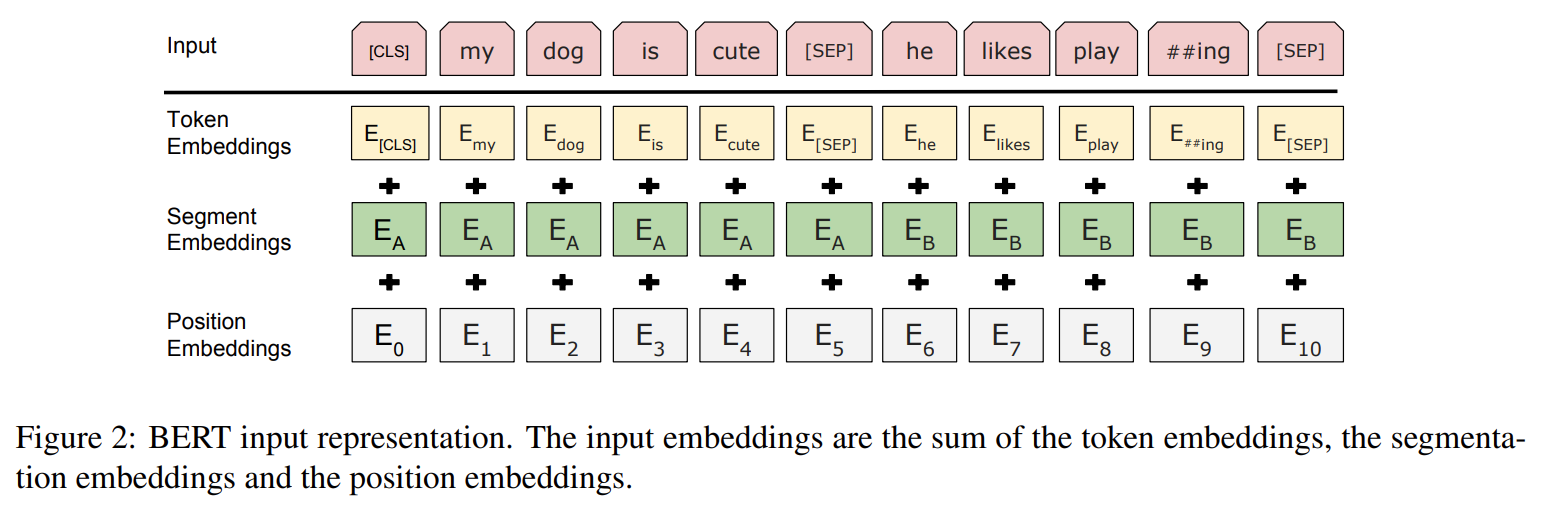

O código abaixo ilustra esses três passos do embeddings do BERT. Após processarmos os tweets com o tokenizer BERTimbau, obtemos a sequência de tokens e seus embeddings correspondentes.


In [26]:
import torch
from transformers import BertTokenizer, BertModel

# Carregar o modelo BERTimbau e o tokenizer
model_name = 'neuralmind/bert-base-portuguese-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Lista de tweets
tweets = [
    "A vacina de COVID-19 salva vidas.",
    "Confie na ciência e vacine-se.",
    "As vacinas são seguras e eficazes.",
    "A desinformação sobre vacinas prejudica a saúde pública.",
    "Muitas pessoas já foram vacinadas contra o COVID-19.",
    "A vachina é perigosa e não foi testada!",
    "Essas vacinas experimentais são uma farsa.",
    "Eu não confio nessa vacina feita às pressas.",
    "A vacina só serve para enriquecer as farmacêuticas.",
    "Prefiro confiar na minha imunidade natural!"
]

# Tokenizando o primeiro tweet
inputs = tokenizer(tweets[0], return_tensors="pt", truncation=True, padding=True)

# Passando pela rede para obter os embeddings
with torch.no_grad():
    outputs = model(**inputs)
    token_embeddings = outputs.last_hidden_state  # Embeddings para cada token

# Exibindo os tokens e seus embeddings
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
print("Tokens do Tweet:")
print(tokens)

print("\nToken Embeddings (primeiros 5 tokens):")
print(token_embeddings[0][:5].numpy())  # Mostrando os embeddings para os primeiros 5 tokens

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Tokens do Tweet:
['[CLS]', 'A', 'vac', '##ina', 'de', 'CO', '##VI', '##D', '-', '19', 'salva', 'vidas', '.', '[SEP]']

Token Embeddings (primeiros 5 tokens):
[[ 0.3156566   0.3814799   0.847185   ... -0.14601168  0.43066818
  -0.20708954]
 [ 0.5928077   0.0521299   1.0175028  ...  0.04264636  0.15865165
  -0.50512606]
 [ 0.32128096  0.11075581  0.07657926 ... -0.04706774  0.03095412
   0.11182152]
 [ 0.6863154  -0.08708614  0.41573375 ...  0.11232676 -0.00461219
  -0.49153888]
 [ 0.37759638  0.17528136  0.8748271  ... -0.20380789 -0.33482856
  -0.7764435 ]]


Tokens do Tweet: Aqui, mostramos os tokens que o modelo BERTimbau gerou a partir do tweet. Isso inclui tokens como palavras inteiras ou subpalavras (no caso de palavras complexas).

Token Embeddings: Para cada token, o BERT gerou um vetor de 768 dimensões. Imprimimos os valores dos embeddings para os primeiros 5 tokens.

* Segment Embeddings

Os segment embeddings indicam se o token pertence ao segmento 0 ou 1. Para tweets individuais, todos os tokens estão no segmento 0. Vamos imprimir os valores dos segment embeddings.

In [27]:
print("\nSegment Embeddings (todos os tokens pertencem ao segmento 0):")
segment_embeddings = torch.zeros_like(token_embeddings)  # Simulando os embeddings do segmento 0
print(segment_embeddings[0][:5].numpy())  # Exibindo os "segment embeddings" (todas as entradas são 0)


Segment Embeddings (todos os tokens pertencem ao segmento 0):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


* Position Embeddings

In [28]:
# A posição de cada token é simplesmente o índice na sequência
print("\nPosition Embeddings (para os tokens):")
position_embeddings = list(range(len(tokens)))  # A posição é o índice do token na sequência
print(position_embeddings)


Position Embeddings (para os tokens):
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


Resumo:
* Token Embeddings: O modelo BERTimbau converte cada token (palavra ou subpalavra) em um vetor denso de 768 dimensões, representando o significado contextual do token no texto.
* Segment Embeddings: Em um único tweet, todos os tokens têm um valor de segmento 0, indicando que pertencem ao mesmo segmento.
* Position Embeddings: A posição de cada token na sequência é representada pelo seu índice (de 0 a 9 no caso do exemplo).

Esses embeddings são combinados internamente pelo modelo para gerar a representação final da sequência, que será usada para tarefas como classificação ou previsão de próxima palavra.

## Transformers

### O que são Transformers?

O modelo **Transformer** foi introduzido no artigo **"Attention is All You Need"** (Vaswani et al., 2017), e é a base de muitos modelos modernos de NLP, incluindo o **BERT**. Antes dos Transformers, os modelos de NLP usavam redes neurais recorrentes (RNNs) e suas variações, como LSTMs, mas os Transformers trouxeram uma abordagem mais eficiente e escalável. A figura abaixo ilustra a arquitetura do Transformers. (Fonte - Vaswani et al., 2017).

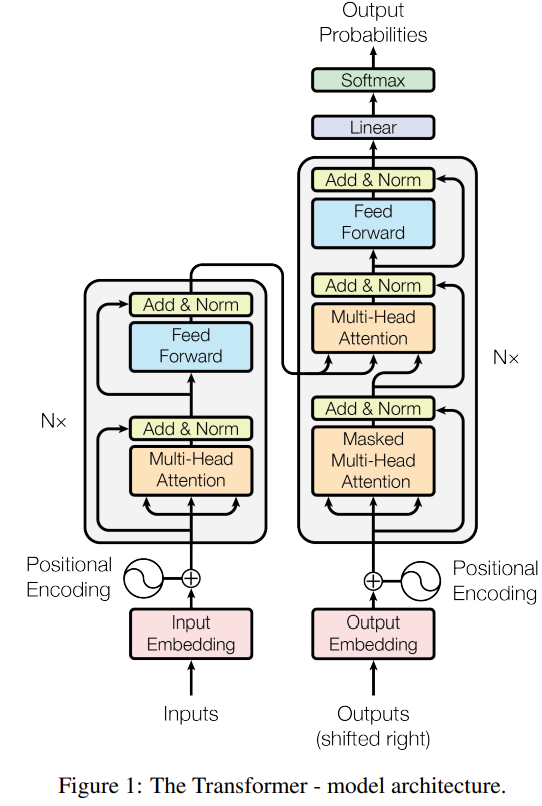


### Componentes principais do Transformer
1. **Self-Attention**: A ideia central do Transformer é o mecanismo de **atenção**, que permite que o modelo foque em diferentes partes da entrada ao processar uma sequência. A **self-attention** faz com que o modelo se atente aos outros tokens da sequência enquanto processa um dado token. Isso resolve problemas de dependências de longo alcance presentes em RNNs e LSTMs.

   - **O que é a atenção?** No modelo Transformer, cada palavra ou token da entrada recebe uma "pontuação de atenção" de todas as outras palavras da sequência. Ou seja, o modelo decide quanto cada palavra deve "prestar atenção" nas outras palavras ao calcular a saída.

2. **Positional Encoding (Codificação Posicional)**: Como o Transformer não tem uma estrutura sequencial como as RNNs, ele não entende a ordem dos tokens na entrada. Para resolver isso, adiciona-se um vetor de **codificação posicional** que representa a posição de cada token na sequência.

3. **Feed-Forward Networks**: Após a atenção, os tokens passam por camadas de redes neurais totalmente conectadas (feed-forward), que ajudam a modelar interações mais complexas entre os tokens.

4. **Normalização e Dropout**: Técnicas de normalização (como LayerNorm) e dropout são usadas para melhorar a estabilidade do treinamento e prevenir o overfitting.

### Arquitetura do Transformer:
- A arquitetura Transformer é composta por duas partes principais:
  1. **Encoder**: A parte do modelo que recebe a sequência de entrada e a processa para gerar representações internas.
  2. **Decoder**: A parte que gera a sequência de saída a partir dessas representações. O BERT, porém, usa apenas a parte **Encoder** do Transformer, pois sua tarefa é entender (e não gerar) o texto.

## Como o BERT Funciona?

O **BERT** (Bidirectional Encoder Representations from Transformers) é um modelo baseado em Transformer, mas ele é diferente de outros modelos, como o GPT (Generative Pre-trained Transformer), devido ao seu treinamento **bidirecional** e ao uso de **máscaras** para treinar o modelo.

### 1. Pré-Treinamento do BERT
O BERT passa por duas tarefas de pré-treinamento:

- **Masked Language Modeling (MLM)**: Ao contrário de modelos unidimensionais como o GPT, que predizem a próxima palavra com base nas palavras anteriores (left-to-right), o BERT usa um processo bidirecional. Em **MLM**, ele "mascara" (oculta) palavras aleatórias de uma sequência e tenta prever essas palavras com base no contexto completo da frase (tanto o que vem antes quanto o que vem depois da palavra mascarada).

Por exemplo, para a frase: "A vacina de COVID-19 salva vidas."

O modelo pode esconder a palavra **"vacina"** e tentar prever qual palavra se encaixa ali com base no contexto de **todas** as palavras ao redor (antes e depois).

- **Next Sentence Prediction (NSP)**: Esta tarefa ajuda o modelo a aprender relações entre pares de frases. Durante o pré-treinamento, o BERT recebe duas frases e tem que prever se a segunda frase segue a primeira ou não. Essa tarefa ajuda o modelo a entender o contexto em maior escala, em vez de apenas aprender relações locais entre palavras.

### 2. Arquitetura do BERT
O BERT é baseado na arquitetura **Transformer Encoder**, o que significa que ele usa apenas as camadas de Encoder do Transformer para gerar representações das entradas. Cada camada do Encoder aplica o mecanismo de self-attention para modelar as interações entre todas as palavras da entrada, criando uma representação contextual para cada palavra.

- O BERT pode ter diferentes tamanhos, com variantes como **BERT-base** (12 camadas) e **BERT-large** (24 camadas).
- Em cada camada, o BERT gera representações vetoriais de todos os tokens na entrada, levando em conta tanto o contexto à esquerda quanto à direita de cada token (graças ao mecanismo bidirecional).

### 3. Uso do BERT para Tarefas de NLP
Após o pré-treinamento, o BERT pode ser **fine-tuned** (ajustado) para tarefas específicas de NLP, como:
- **Classificação de Sentimentos**: Entender se o texto é positivo ou negativo.
- **Reconhecimento de Entidades Nomeadas (NER)**: Identificar nomes de pessoas, locais, etc.
- **Resposta a Perguntas**: Identificar a resposta em um texto com base a uma pergunta.
- **Tradução Automática**, entre outras tarefas.


### Exemplo do Funcionamento do BERT

Voltando ao mesmo exemplo:

* "A vacina de COVID-19 salva vidas."

Após ser tokenizado, o modelo passa por todas as camadas do Encoder e gera representações contextuais para cada token. A palavra "vacina", por exemplo, será representada de maneira diferente dependendo do contexto em que ela aparece (aqui, como parte de uma frase positiva sobre saúde).

Resumo:
* Transformers são a arquitetura central dos modelos modernos de NLP, e seu componente mais importante é a atenção.
* BERT é uma implementação de Transformer que utiliza um treinamento bidirecional e máscaras para prever palavras ausentes, o que permite ao modelo entender melhor o contexto completo.
* O BERT pode ser fine-tuned para uma variedade de tarefas de NLP, tornando-o um modelo de grande sucesso em várias aplicações de linguagem.
* O grande diferencial do BERT é sua capacidade de entender o contexto completo (à esquerda e à direita) de uma palavra ou frase, o que melhora significativamente a performance em várias tarefas de NLP.

### Referências e Links Importantes

1. **Artigo Original do Transformer** (Vaswani et al., 2017):
   - Título: [Attention is All You Need](https://arxiv.org/abs/1706.03762)
   - Este é o artigo original que introduziu o modelo Transformer, apresentando a arquitetura e o conceito de atenção, que é a base de modelos como o BERT.

2. **Artigo Original do BERT** (Devlin et al., 2018):
   - Título: [BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding](https://arxiv.org/abs/1810.04805)
   - Este é o artigo que descreve o BERT, explicando seu treinamento bidirecional e as tarefas de pré-treinamento como o *Masked Language Model* (MLM) e o *Next Sentence Prediction* (NSP).

3. **Tutorial sobre Transformers no Hugging Face**:
   - [Transformers: State-of-the-Art Natural Language Processing for Pytorch, TensorFlow, and JAX](https://huggingface.co/transformers/)
   - A Hugging Face fornece uma biblioteca popular para trabalhar com modelos Transformer, incluindo o BERT. Este link inclui tutoriais, documentação e exemplos práticos para usar Transformers em suas próprias tarefas de NLP.

4. **Documentação do BERTimbau** (BERT para o português):
   - [BERTimbau: BERT para o português](https://huggingface.co/neuralmind/bert-base-portuguese-cased)
   - O BERTimbau é uma versão do BERT treinada especificamente para a língua portuguesa.

### Livros e Artigos Recomendados

1. **"Deep Learning" (Ian Goodfellow, Yoshua Bengio, Aaron Courville)**:
   - Embora não trate especificamente de Transformers, este livro é uma excelente referência para quem deseja entender os fundamentos das redes neurais profundas, que são a base de modelos como o Transformer.

2. **"Natural Language Processing with Transformers" (Hugging Face)**:
   - Este livro, disponível  [O'Reilly](https://www.amazon.com/Natural-Language-Processing-Transformers-Revised-ebook/dp/B0B2FKYVNL), oferece uma introdução mais aprofundada sobre como usar Transformers para tarefas de NLP, incluindo o uso de BERT. Vou incluir esta leitura para a próxima aula.